# Spanish High Speed Rail tickets pricing Analytics


Created by Yuhong on 13-Jun-2019.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

> The data source of this project is from [Kaggle](https://www.kaggle.com/thegurus/spanish-high-speed-rail-system-ticket-pricing).

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
# load data
df=pd.read_csv('renfe.csv')
df.head(1)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,Turista,Promo


In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 10 columns):
Unnamed: 0     int64
insert_date    object
origin         object
destination    object
start_date     object
end_date       object
train_type     object
price          float64
train_class    object
fare           object
dtypes: float64(1), int64(1), object(8)
memory usage: 196.8+ MB


In [4]:
df.shape

(2579771, 10)

### Data Wragling

In [5]:
# handling missing data
sum(df.isna().any(axis=1))

310681

In [6]:
df.isna().any(axis=0)

Unnamed: 0     False
insert_date    False
origin         False
destination    False
start_date     False
end_date       False
train_type     False
price           True
train_class     True
fare            True
dtype: bool

In [7]:
# View rows with missing data
df[df.isna().any(axis=1)].head(10)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
4,4,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:30:00,2019-05-29 11:14:00,ALVIA,NaN,Turista,Promo
9,9,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 11:05:00,2019-05-29 13:41:00,ALVIA,NaN,Turista,Promo
12,12,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 13:30:00,2019-05-29 16:05:00,ALVIA,NaN,Turista,Promo
28,28,2019-04-19 05:31:54,MADRID,SEVILLA,2019-04-23 08:30:00,2019-04-23 11:14:00,ALVIA,NaN,Turista,Flexible
37,37,2019-04-19 05:31:54,MADRID,SEVILLA,2019-04-23 13:30:00,2019-04-23 16:05:00,ALVIA,NaN,Turista,Promo
48,48,2019-04-19 05:32:09,MADRID,SEVILLA,2019-05-26 08:30:00,2019-05-26 11:14:00,ALVIA,NaN,Turista,Flexible
51,51,2019-04-19 05:32:09,MADRID,SEVILLA,2019-05-26 11:05:00,2019-05-26 13:41:00,ALVIA,NaN,Preferente,Promo
54,54,2019-04-19 05:32:09,MADRID,SEVILLA,2019-05-26 13:30:00,2019-05-26 16:05:00,ALVIA,NaN,Turista,Promo
61,61,2019-04-19 05:32:09,MADRID,SEVILLA,2019-05-26 18:35:00,2019-05-26 21:08:00,ALVIA,NaN,Turista,Promo
73,73,2019-04-19 05:32:20,SEVILLA,MADRID,2019-05-28 09:50:00,2019-05-28 12:36:00,ALVIA,NaN,Turista,Promo


In [8]:
# Drop rows with missing value
df.dropna(inplace=True)
sum(df.isna().any(axis=1))

0

In [9]:
# change data types
df['insert_date']=pd.to_datetime(df['insert_date'])
df['start_date'] =pd.to_datetime(df['start_date'])
df['end_date']=pd.to_datetime(df['end_date'])

In [10]:
df.dtypes

Unnamed: 0              int64
insert_date    datetime64[ns]
origin                 object
destination            object
start_date     datetime64[ns]
end_date       datetime64[ns]
train_type             object
price                 float64
train_class            object
fare                   object
dtype: object

In [11]:
df['price'].agg({'max','min'})

max    214.20
min     15.45
Name: price, dtype: float64

In [12]:
df['start_date'].agg({'max','min'})

max   2019-07-07 22:14:00
min   2019-04-12 05:50:00
Name: start_date, dtype: datetime64[ns]

In [13]:
df['end_date'].agg({'max','min'})

max   2019-07-08 04:31:00
min   2019-04-12 08:38:00
Name: end_date, dtype: datetime64[ns]

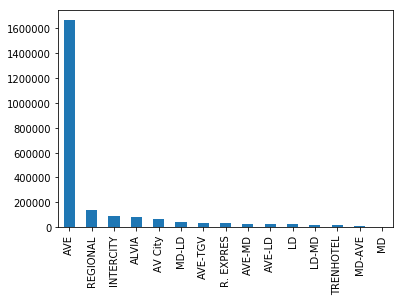

In [14]:
df['train_type'].value_counts().plot.bar()

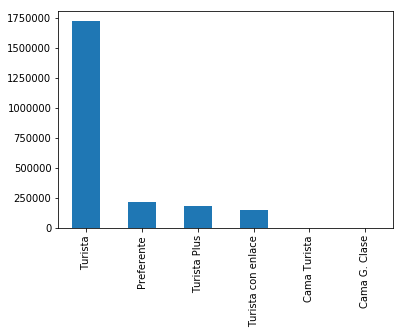

In [15]:
df['train_class'].value_counts().plot.bar()

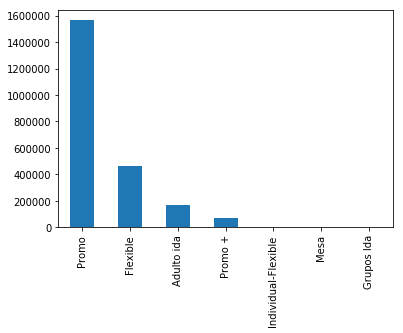

In [16]:
df['fare'].value_counts().plot.bar()

## Exploratary Analysis

### Question 1: Where marjority travellers go? 

In [17]:
df.groupby(by=['origin','destination'])['price'].describe()

count       mean        std    min    25%    50%  \
origin     destination                                                        
BARCELONA  MADRID       396228.0  84.671718  22.049790  32.30  68.95  85.10   
MADRID     BARCELONA    438401.0  85.681242  22.162031  32.30  75.40  85.10   
           PONFERRADA    63504.0  45.261351  10.576088  24.95  37.45  44.70   
           SEVILLA      316123.0  62.880378  14.316176  22.90  53.40  61.45   
           VALENCIA     358137.0  42.005000  15.728510  15.45  28.35  39.45   
PONFERRADA MADRID        71255.0  42.004859  10.407848  16.75  33.50  42.75   
SEVILLA    MADRID       309541.0  62.470221  15.087262  22.90  52.20  60.30   
VALENCIA   MADRID       315901.0  39.852544  15.086576  15.45  28.35  33.65   

                           75%    max  
origin     destination                 
BARCELONA  MADRID       100.40  214.2  
MADRID     BARCELONA    100.40  214.2  
           PONFERRADA    55.80  150.6  
           SEVILLA       76.30  128.5  
           VALENCIA      53.25  159.6  
PONFERRADA MADRID        47.00  150.6  
SEVILLA    MADRID        76.30  128.5  
VALENCIA   MADRID        51.15  123.2

### Obeservations
- MADRID,Spain's central capital, has the biggest inbound and outbound trafic volume.
- The volume and ticket price of trips between BARCELONA and MADRID are highest among others.

### Question 2: Which route is the key revenue contributor?

In [18]:
df_mjr=df.groupby(by=['origin','destination','train_type','train_class'])['price'].agg({'count',('sum',lambda x: x.astype(float).sum())}).reset_index()
df_mjr.head(10)

,origin,destination,train_type,train_class,count,sum
0,BARCELONA,MADRID,AVE,Preferente,26640,2937976.78
1,BARCELONA,MADRID,AVE,Turista,267387,22353833.22
2,BARCELONA,MADRID,AVE,Turista Plus,69190,6171423.73
3,BARCELONA,MADRID,AVE-TGV,Preferente,1321,150234.55
4,BARCELONA,MADRID,AVE-TGV,Turista,10100,819975.19
5,BARCELONA,MADRID,AVE-TGV,Turista Plus,4042,356911.05
6,BARCELONA,MADRID,R. EXPRES,Turista,17548,758951.00
7,MADRID,BARCELONA,AVE,Preferente,33894,3691989.55
8,MADRID,BARCELONA,AVE,Turista,298608,25131425.03
9,MADRID,BARCELONA,AVE,Turista Plus,75154,6650271.16


In [19]:
df_mjr['count_per']=df_mjr['count']/sum(df_mjr['count'])
df_mjr['sum_per']=df_mjr['sum']/sum(df_mjr['sum'])

In [20]:
df_mjr.sort_values('count_per',ascending=False, inplace=True)

In [21]:
df_mjr['origin_destination']=df_mjr['origin']+"-"+df_mjr['destination']
df_mjr.set_index('origin_destination',inplace=True)
df_mjr.head(6).sum()

origin         MADRIDBARCELONASEVILLAMADRIDMADRIDVALENCIA
destination    BARCELONAMADRIDMADRIDSEVILLAVALENCIAMADRID
train_type                             AVEAVEAVEAVEAVEAVE
train_class    TuristaTuristaTuristaTuristaTuristaTurista
count                                             1320480
sum                                           8.78415e+07
count_per                                        0.581943
sum_per                                          0.610742
dtype: object

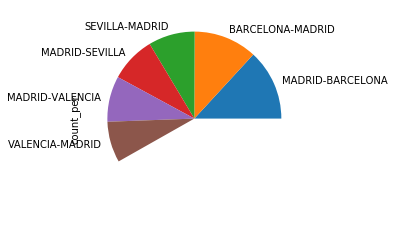

In [22]:
df_mjr.head(6).plot(kind='pie',y='count_per',legend=False)

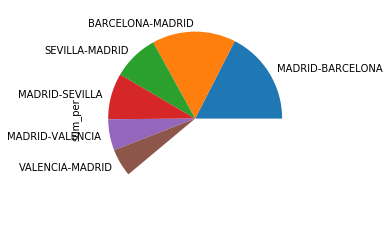

In [23]:
df_mjr.head(6).plot(kind='pie',y='sum_per',legend=False)

### Observations
- 58.2% travellers travel among three cities: MADRID,BARCELONA,and SEVILLA taking AVE train and Turista class.This group of travellers also contributes highest revenue, which is 61% of total.
- However, travellers between MADRID and BARCELONA contribute relatively higher revenue per trip than others.

### Question 3: Which is the most cost-saving approach to travel between Madrid and Barcelona?

In [24]:
# group data by origin, destination, train class, and fare
# since most travllers travel between Madrid and Barcelona, the investigation will focus on Barcelona and Madrid 
df_app=df.groupby(by=['origin','destination','train_class','fare'])['price'].describe().reset_index()
df_app.head(2)

,origin,destination,train_class,fare,count,mean,std,min,25%,50%,75%,max
0,BARCELONA,MADRID,Preferente,Flexible,3933.0,183.204805,10.109003,140.0,181.5,181.5,181.50,214.2
1,BARCELONA,MADRID,Preferente,Promo,24025.0,98.537017,20.240734,53.2,86.8,98.0,112.55,169.2


In [25]:
# select trips made between Madrid and Barcelona
df_app.query('origin in ("BARCELONA" ,"MADRID" ) and destination in ("MADRID","BARCELONA")', inplace=True)
df_app.head(1)

,origin,destination,train_class,fare,count,mean,std,min,25%,50%,75%,max
0,BARCELONA,MADRID,Preferente,Flexible,3933.0,183.204805,10.109003,140.0,181.5,181.5,181.5,214.2


In [26]:
# view info in order
df_app.sort_values(['mean'])

,origin,destination,train_class,fare,count,mean,std,min,25%,50%,75%,max
3,BARCELONA,MADRID,Turista,Adulto ida,17548.0,43.250000,0.000000e+00,43.25,43.25,43.25,43.25,43.25
10,MADRID,BARCELONA,Turista,Adulto ida,13479.0,43.250000,0.000000e+00,43.25,43.25,43.25,43.25,43.25
5,BARCELONA,MADRID,Turista,Promo,230726.0,77.729264,1.377083e+01,32.30,66.75,78.80,85.10,100.41
13,MADRID,BARCELONA,Turista,Promo,256082.0,77.785768,1.346227e+01,32.30,68.65,78.80,85.10,100.41
17,MADRID,BARCELONA,Turista Plus,Promo,77305.0,87.836197,1.359169e+01,38.80,80.15,90.50,102.15,120.50
7,BARCELONA,MADRID,Turista Plus,Promo,71613.0,88.167518,1.285092e+01,38.80,80.15,90.50,102.15,120.50
14,MADRID,BARCELONA,Turista,Promo +,32.0,94.868750,7.608333e+00,85.15,90.45,90.45,106.75,106.75
1,BARCELONA,MADRID,Preferente,Promo,24025.0,98.537017,2.024073e+01,53.20,86.80,98.00,112.55,169.20
9,MADRID,BARCELONA,Preferente,Promo,30848.0,99.414082,2.152892e+01,53.20,86.80,98.00,115.65,169.20
2,BARCELONA,MADRID,Preferente,Promo +,3.0,105.000000,0.000000e+00,105.00,105.00,105.00,105.00,105.00


In [27]:
# investigate fixed price and non-fixed price
# fixed price 
df_app_fixed=df_app[df_app['min'] == df_app['max']]
df_app_fixed

,origin,destination,train_class,fare,count,mean,std,min,25%,50%,75%,max
2,BARCELONA,MADRID,Preferente,Promo +,3.0,105.00,0.000000e+00,105.00,105.00,105.00,105.00,105.00
3,BARCELONA,MADRID,Turista,Adulto ida,17548.0,43.25,0.000000e+00,43.25,43.25,43.25,43.25,43.25
10,MADRID,BARCELONA,Turista,Adulto ida,13479.0,43.25,0.000000e+00,43.25,43.25,43.25,43.25,43.25
12,MADRID,BARCELONA,Turista,Mesa,33.0,172.40,5.772476e-14,172.40,172.40,172.40,172.40,172.40
16,MADRID,BARCELONA,Turista Plus,Mesa,44.0,206.80,5.750059e-14,206.80,206.80,206.80,206.80,206.80


In [28]:
# non-fixed price
df_app_vary=df_app[df_app['min'] != df_app['max']]
df_app_vary

,origin,destination,train_class,fare,count,mean,std,min,25%,50%,75%,max
0,BARCELONA,MADRID,Preferente,Flexible,3933.0,183.204805,10.109003,140.00,181.50,181.50,181.50,214.20
1,BARCELONA,MADRID,Preferente,Promo,24025.0,98.537017,20.240734,53.20,86.80,98.00,112.55,169.20
4,BARCELONA,MADRID,Turista,Flexible,46761.0,112.051631,8.092363,107.70,107.70,107.70,107.70,127.10
5,BARCELONA,MADRID,Turista,Promo,230726.0,77.729264,13.770832,32.30,66.75,78.80,85.10,100.41
6,BARCELONA,MADRID,Turista Plus,Flexible,1619.0,132.423904,7.921777,129.30,129.30,129.30,129.30,152.50
7,BARCELONA,MADRID,Turista Plus,Promo,71613.0,88.167518,12.850917,38.80,80.15,90.50,102.15,120.50
8,MADRID,BARCELONA,Preferente,Flexible,4465.0,185.652049,14.525606,140.00,181.50,181.50,181.50,214.20
9,MADRID,BARCELONA,Preferente,Promo,30848.0,99.414082,21.528918,53.20,86.80,98.00,115.65,169.20
11,MADRID,BARCELONA,Turista,Flexible,54416.0,112.661945,8.464169,107.70,107.70,107.70,127.10,127.10
13,MADRID,BARCELONA,Turista,Promo,256082.0,77.785768,13.462267,32.30,68.65,78.80,85.10,100.41


### Observations
- Ticket price from BARCELONA to MADRID varies except for below 2 combinations
    - Preferente class on Promo+ package
    - Turista class on Adulto ida package
- Tickeet price from MADRID to BARCELONA varies expect for below 3 combinations
    - Turista class on Adulto ida package
    - Turista class on Mesa package
    - Turista Plus on Mesa package


Overall, if the travelelr prefer fixed price, Turista class on Adulto ida package provides the lowest price to travel, which is 43.25 Euro and selected by majority travellers.

### Question 4: Is there any travel time restrictions to use Turista class on Adulto ida package?

In [29]:
# investigate if there is travel time restrictions.
df_fixed_cheapest=df.query('origin in ("BARCELONA","MADRID") and destination in ("BARCELONA","MADRID") and train_class=="Turista" and fare=="Adulto ida"')
df_fixed_cheapest.head(2)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
1826,1826,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 09:03:00,2019-04-25 18:07:00,R. EXPRES,43.25,Turista,Adulto ida
1945,1945,2019-04-19 06:00:54,MADRID,BARCELONA,2019-04-26 07:15:00,2019-04-26 16:37:00,R. EXPRES,43.25,Turista,Adulto ida


In [30]:
times=pd.to_datetime(df_fixed_cheapest['start_date']).dt.time

In [31]:
for time in times.unique():
    print(time.strftime("%H:%M:%S"))

09:03:00
07:15:00


### Observations: 

There is restrictions to use Turista class on Adulto ida package, traveller can only use it on 9:30 and 7:15.

### Question 5: What if traveller prefer non-fixed package? which one is the most cost-saving way?

In [32]:
# investigate non-fixed trips
df_app_vary.sort_values(by='min',ascending=True).head(2)

,origin,destination,train_class,fare,count,mean,std,min,25%,50%,75%,max
5,BARCELONA,MADRID,Turista,Promo,230726.0,77.729264,13.770832,32.3,66.75,78.8,85.1,100.41
13,MADRID,BARCELONA,Turista,Promo,256082.0,77.785768,13.462267,32.3,68.65,78.8,85.1,100.41


In [33]:
# assume price vary because of train class, fare package, and travel time. 
# investigate further on how price change because of travel time
df_turista_promo=df.query('origin in ("BARCELONA","MADRID") and destination in ("BARCELONA","MADRID") and train_class=="Turista" and fare=="Promo"')
df_turista_promo.head(1)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
1815,1815,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 05:50:00,2019-04-25 08:20:00,AVE,49.55,Turista,Promo


In [34]:
df_turista_promo['price'].agg({'min','max','count','mean'})

count    486808.000000
max         100.410000
min          32.300000
mean         77.758987
Name: price, dtype: float64

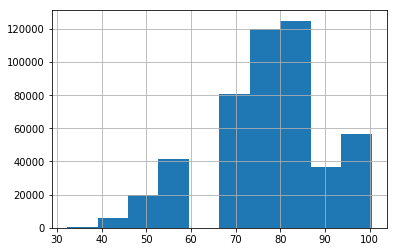

In [35]:
# plot histgram to show the distribution of price
df_turista_promo['price'].hist()

In [36]:
df_turista_promo_time=df_turista_promo.assign(start_time=df_turista_promo['start_date'].dt.time)
df_turista_promo_time.head(1)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,start_time
1815,1815,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 05:50:00,2019-04-25 08:20:00,AVE,49.55,Turista,Promo,05:50:00


In [37]:
df_groupby_time=df_turista_promo_time.groupby(['start_time'])['price'].describe().reset_index()
df_groupby_time.sort_values('min', ascending=True)

,start_time,count,mean,std,min,25%,50%,75%,max
0,05:50:00,11499.0,61.791430,12.119396,32.30,49.55,58.15,66.75,85.10
3,06:20:00,3399.0,60.253913,7.782551,32.30,58.15,58.15,66.75,85.10
43,19:30:00,10993.0,69.934099,10.453177,32.30,66.75,75.40,75.40,85.10
28,14:30:00,8733.0,73.105094,9.338859,32.30,66.75,75.40,85.10,85.10
25,12:50:00,7822.0,73.463895,9.731660,32.30,66.75,75.40,85.10,85.10
45,20:30:00,10489.0,63.033473,11.594604,40.95,58.15,66.75,66.75,85.10
44,20:00:00,22377.0,73.481747,15.849593,40.95,66.75,75.40,85.10,100.40
41,19:00:00,12799.0,75.030291,17.530300,40.95,58.15,78.80,88.95,100.40
37,17:30:00,5180.0,75.421737,10.029314,40.95,66.75,75.40,85.10,85.10
31,15:30:00,3752.0,79.099693,8.579836,40.95,75.40,85.10,85.10,85.10


In [38]:
df_time_in_low=df_turista_promo_time.loc[df_turista_promo_time['start_time'].isin(df_groupby_time[df_groupby_time['min']==32.30]['start_time'])]
df_time_in_low.sort_values('price')

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,start_time
1495848,1495848,2019-05-08 13:00:59,MADRID,BARCELONA,2019-06-27 05:50:00,2019-06-27 08:55:00,AVE,32.3,Turista,Promo,05:50:00
1421835,1421835,2019-05-07 07:14:25,MADRID,BARCELONA,2019-07-04 05:50:00,2019-07-04 08:55:00,AVE,32.3,Turista,Promo,05:50:00
1567311,1567311,2019-05-09 11:13:10,MADRID,BARCELONA,2019-06-13 05:50:00,2019-06-13 08:55:00,AVE,32.3,Turista,Promo,05:50:00
1567512,1567512,2019-05-09 11:14:03,MADRID,BARCELONA,2019-06-06 05:50:00,2019-06-06 08:55:00,AVE,32.3,Turista,Promo,05:50:00
1421204,1421204,2019-05-07 07:04:04,MADRID,BARCELONA,2019-06-03 14:30:00,2019-06-03 17:21:00,AVE,32.3,Turista,Promo,14:30:00
1421043,1421043,2019-05-07 07:03:36,MADRID,BARCELONA,2019-06-06 05:50:00,2019-06-06 08:55:00,AVE,32.3,Turista,Promo,05:50:00
1576612,1576612,2019-05-09 13:43:44,MADRID,BARCELONA,2019-07-06 06:20:00,2019-07-06 09:29:00,AVE,32.3,Turista,Promo,06:20:00
1576624,1576624,2019-05-09 13:43:44,MADRID,BARCELONA,2019-07-06 19:30:00,2019-07-06 22:40:00,AVE,32.3,Turista,Promo,19:30:00
1576653,1576653,2019-05-09 13:43:59,MADRID,BARCELONA,2019-07-04 05:50:00,2019-07-04 08:55:00,AVE,32.3,Turista,Promo,05:50:00
1576911,1576911,2019-05-09 13:45:27,MADRID,BARCELONA,2019-06-20 05:50:00,2019-06-20 08:55:00,AVE,32.3,Turista,Promo,05:50:00


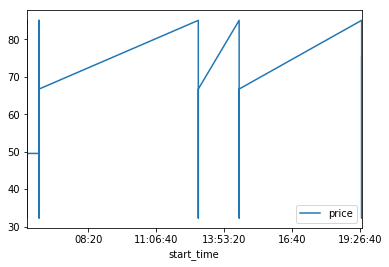

In [39]:
df_time_in_low.plot(kind='line',x='start_time',y='price')

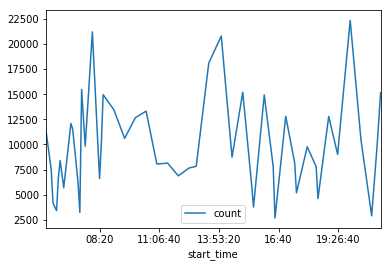

In [40]:
df_groupby_time.plot.line(x='start_time',y='count')

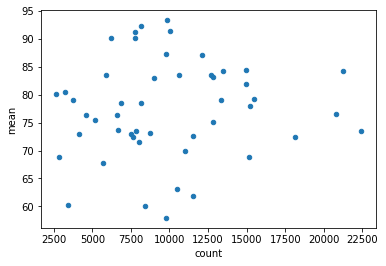

In [41]:
df_groupby_time.plot.scatter(x='count',y='mean')

In [42]:
df_turista_promo_less_60=df_turista_promo[df_turista_promo['price']<60]
df_turista_promo_less_60.head(1)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
1815,1815,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 05:50:00,2019-04-25 08:20:00,AVE,49.55,Turista,Promo


In [43]:
df_turista_promo_less_60.assign(start_time=df_turista_promo_less_60['start_date'].dt.time)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,start_time
1815,1815,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 05:50:00,2019-04-25 08:20:00,AVE,49.55,Turista,Promo,05:50:00
1828,1828,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 11:00:00,2019-04-25 13:45:00,AVE,58.15,Turista,Promo,11:00:00
1829,1829,2019-04-19 05:47:27,BARCELONA,MADRID,2019-04-25 12:00:00,2019-04-25 15:10:00,AVE,58.15,Turista,Promo,12:00:00
1916,1916,2019-04-19 06:00:47,MADRID,BARCELONA,2019-04-27 17:30:00,2019-04-27 20:40:00,AVE,58.15,Turista,Promo,17:30:00
1919,1919,2019-04-19 06:00:47,MADRID,BARCELONA,2019-04-27 20:30:00,2019-04-27 23:40:00,AVE,58.15,Turista,Promo,20:30:00
1920,1920,2019-04-19 06:00:45,MADRID,BARCELONA,2019-04-28 06:20:00,2019-04-28 09:29:00,AVE,49.55,Turista,Promo,06:20:00
1922,1922,2019-04-19 06:00:45,MADRID,BARCELONA,2019-04-28 08:30:00,2019-04-28 11:15:00,AVE,58.15,Turista,Promo,08:30:00
1948,1948,2019-04-19 06:00:54,MADRID,BARCELONA,2019-04-26 08:30:00,2019-04-26 11:15:00,AVE,58.15,Turista,Promo,08:30:00
1952,1952,2019-04-19 06:00:54,MADRID,BARCELONA,2019-04-26 12:30:00,2019-04-26 15:30:00,AVE,58.15,Turista,Promo,12:30:00
1971,1971,2019-04-19 06:00:54,MADRID,BARCELONA,2019-04-25 06:30:00,2019-04-25 09:20:00,AVE,58.15,Turista,Promo,06:30:00


In [44]:
df_turista_promo_greater_60=df_turista_promo[df_turista_promo['price']>60]
df_turista_promo_greater_60['price'].min()

66.75

In [45]:
df_turista_promo_less_60.sort_values(by=['price','origin'],ascending=True).head(1)

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
1392099,1392099,2019-05-06 21:08:10,BARCELONA,MADRID,2019-06-23 12:50:00,2019-06-23 15:45:00,AVE-TGV,32.3,Turista,Promo


In [46]:
less_60_days=df_turista_promo_less_60['start_date'].dt.date

In [47]:
# whether it is weekday or weekend does not matter
for day in less_60_days:
    if day.weekday()>5:
        print(day.weekday())
        break

6


In [48]:
less_60_times=df_turista_promo_less_60['start_date'].dt.time
df_turista_promo_less_60_2=df_turista_promo_less_60.assign(start_time=df_turista_promo_less_60['start_date'].dt.time)

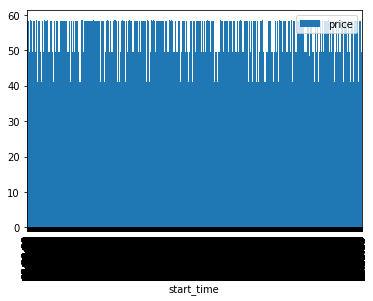

In [49]:
df_turista_promo_less_60_2.plot.bar(x='start_time',y='price')

In [50]:
greater_60_times=df_turista_promo_greater_60['start_date'].dt.time

In [51]:
for time in greater_60_times.unique():
    print(time.strftime("%H:%M:%S"))

06:25:00
07:05:00
07:40:00
08:00:00
08:25:00
13:25:00
17:00:00
17:25:00
18:25:00
21:15:00
07:30:00
16:30:00
10:30:00
14:00:00
16:00:00
19:00:00
20:00:00
05:50:00
06:30:00
21:25:00
06:10:00
07:20:00
15:00:00
06:20:00
08:30:00
09:30:00
18:00:00
19:30:00
20:30:00
11:30:00
07:00:00
12:30:00
14:30:00
08:20:00
15:30:00
17:30:00
09:00:00
18:30:00
19:25:00
06:05:00
10:00:00
12:00:00
06:40:00
12:50:00
15:25:00
16:25:00
11:00:00
21:00:00
07:25:00


In [52]:
# compare to see if two arrays are same
np.array_equal(greater_60_times,less_60_times)

False

In [53]:
df_turista_promo_less_60['time']=df_turista_promo_less_60['start_date'].dt.time

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Observations

- the price of ticket depends on train time, if a traveller 